In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [11]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


38.58603887691447 136.8187273535117
-65.1278903953806 -161.97557400941747
-19.557943712199943 -92.76264574891717
24.04142557718899 -167.02968199637382
68.4862296285898 -103.68679660814334
22.34116817705774 -64.13858188078015
49.58831789159342 -128.37223932883862
-41.683291963475725 -43.69946300552951
49.47004361753494 -6.73217465944137
-27.830204378335083 -26.890129920823398
45.70731409676233 112.44216975347462
-54.53855452870599 136.8288270952744
40.29494646205802 -84.22332667458267
-49.276222054932916 -169.36839343239927
-76.59794797119325 -34.589323912442524
-69.17078974158065 -84.98174739221653
79.27527846286566 -114.73600317102299
-62.828115074851574 -75.40785839046015
78.44703393346 -93.68476641407564
3.24971144831116 -0.012826719403335574
34.746810562955204 -74.25586343132397
34.97002276869861 -71.23218085944708
-41.06242543947509 -88.06322994456465
-76.3457664127711 135.7534270936589
33.69062183840542 92.11448177337849
-47.14777996319537 166.4607179233147
44.66950384894642 117.

In [12]:
from citipy import citipy

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


602

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wajima
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | hualmay
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | road town
Processing Record 7 of Set 1 | port hardy
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | penzance
Processing Record 10 of Set 1 | vila velha
Processing Record 11 of Set 1 | baruun-urt
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | sidney
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | mumford
Processing Record 19 of Set 1 | elizabeth city
Processing Record 20 of Set 1 | virginia beach
Processing Record 21 of Set 1 | ancud
Processing Record 22 of Set 1 | hobart
Processing Record 23 of Set 1 | lasa
Proc

Processing Record 39 of Set 4 | lompoc
Processing Record 40 of Set 4 | vila franca do campo
Processing Record 41 of Set 4 | katha
City not found. Skipping...
Processing Record 42 of Set 4 | zyryanka
Processing Record 43 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | wagga wagga
Processing Record 46 of Set 4 | nizhnyaya pavlovka
City not found. Skipping...
Processing Record 47 of Set 4 | luderitz
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | kampong chhnang
Processing Record 50 of Set 4 | kirakira
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | borba
Processing Record 3 of Set 5 | ust-kut
Processing Record 4 of Set 5 | buraydah
Processing Record 5 of Set 5 | butaritari
Processing Record 6 of Set 5 | ndele
Processing Record 7 of Set 5 | kenai
Processing Record 8 of Set 5 | lanzhot
Processing Record 9 of Set 5 | damietta
Processing Record 10 of Set 5 | bloem

Processing Record 28 of Set 8 | sioux lookout
Processing Record 29 of Set 8 | tilichiki
Processing Record 30 of Set 8 | pangnirtung
Processing Record 31 of Set 8 | wanaka
Processing Record 32 of Set 8 | asau
Processing Record 33 of Set 8 | ak-dovurak
Processing Record 34 of Set 8 | hami
Processing Record 35 of Set 8 | bilibino
Processing Record 36 of Set 8 | benidorm
Processing Record 37 of Set 8 | sattahip
Processing Record 38 of Set 8 | olafsvik
Processing Record 39 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 40 of Set 8 | lahaina
Processing Record 41 of Set 8 | huangnihe
Processing Record 42 of Set 8 | silver city
Processing Record 43 of Set 8 | rincon
Processing Record 44 of Set 8 | hamilton
Processing Record 45 of Set 8 | shenjiamen
Processing Record 46 of Set 8 | karsun
Processing Record 47 of Set 8 | cairns
Processing Record 48 of Set 8 | tiksi
Processing Record 49 of Set 8 | hofn
Processing Record 50 of Set 8 | muromtsevo
Processing Record 1 of Set 9 | 

Processing Record 16 of Set 12 | ruteng
Processing Record 17 of Set 12 | sola
Processing Record 18 of Set 12 | batagay
Processing Record 19 of Set 12 | tula
Processing Record 20 of Set 12 | grinnell
Processing Record 21 of Set 12 | kayankulam
Processing Record 22 of Set 12 | imbituba
Processing Record 23 of Set 12 | mongu
Processing Record 24 of Set 12 | kirkuk
Processing Record 25 of Set 12 | ampanihy
Processing Record 26 of Set 12 | xiaolingwei
Processing Record 27 of Set 12 | terrace
Processing Record 28 of Set 12 | malayal
Processing Record 29 of Set 12 | pontianak
Processing Record 30 of Set 12 | ust-kuyga
Processing Record 31 of Set 12 | gold coast
Processing Record 32 of Set 12 | raypur
Processing Record 33 of Set 12 | yarada
Processing Record 34 of Set 12 | tazovskiy
Processing Record 35 of Set 12 | sao miguel do araguaia
Processing Record 36 of Set 12 | yuanping
Processing Record 37 of Set 12 | lakes entrance
Processing Record 38 of Set 12 | belaya gora
Processing Record 39 of

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wajima,37.4000,136.9000,35.04,62,99,10.04,JP,2023-01-30 20:22:11
1,Mataura,-46.1927,168.8643,63.54,72,77,3.33,NZ,2023-01-30 20:18:32
2,Hualmay,-11.0964,-77.6139,75.78,74,79,9.33,PE,2023-01-30 20:22:12
3,Kapaa,22.0752,-159.3190,71.58,88,100,5.99,US,2023-01-30 20:22:12
4,Yellowknife,62.4560,-114.3525,-17.88,76,75,5.75,CA,2023-01-30 20:21:14
5,Road Town,18.4167,-64.6167,80.69,74,40,10.36,VG,2023-01-30 20:22:13
6,Port Hardy,50.6996,-127.4199,33.98,75,100,3.44,CA,2023-01-30 20:22:13
7,Chuy,-33.6971,-53.4616,79.00,64,49,12.62,UY,2023-01-30 20:22:14
8,Penzance,50.1186,-5.5371,45.28,74,100,9.31,GB,2023-01-30 20:18:36
9,Vila Velha,-20.3297,-40.2925,82.35,76,20,17.27,BR,2023-01-30 20:22:14


In [16]:
len(city_data)

557

In [17]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Wajima,JP,2023-01-30 20:22:11,37.4000,136.9000,35.04,62,99,10.04
1,Mataura,NZ,2023-01-30 20:18:32,-46.1927,168.8643,63.54,72,77,3.33
2,Hualmay,PE,2023-01-30 20:22:12,-11.0964,-77.6139,75.78,74,79,9.33
3,Kapaa,US,2023-01-30 20:22:12,22.0752,-159.3190,71.58,88,100,5.99
4,Yellowknife,CA,2023-01-30 20:21:14,62.4560,-114.3525,-17.88,76,75,5.75
5,Road Town,VG,2023-01-30 20:22:13,18.4167,-64.6167,80.69,74,40,10.36
6,Port Hardy,CA,2023-01-30 20:22:13,50.6996,-127.4199,33.98,75,100,3.44
7,Chuy,UY,2023-01-30 20:22:14,-33.6971,-53.4616,79.00,64,49,12.62
8,Penzance,GB,2023-01-30 20:18:36,50.1186,-5.5371,45.28,74,100,9.31
9,Vila Velha,BR,2023-01-30 20:22:14,-20.3297,-40.2925,82.35,76,20,17.27


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


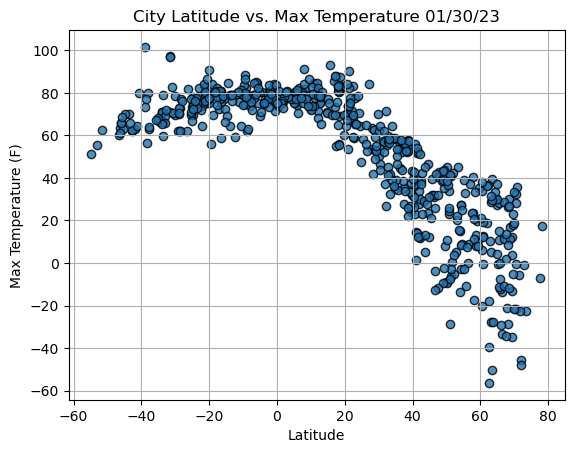

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


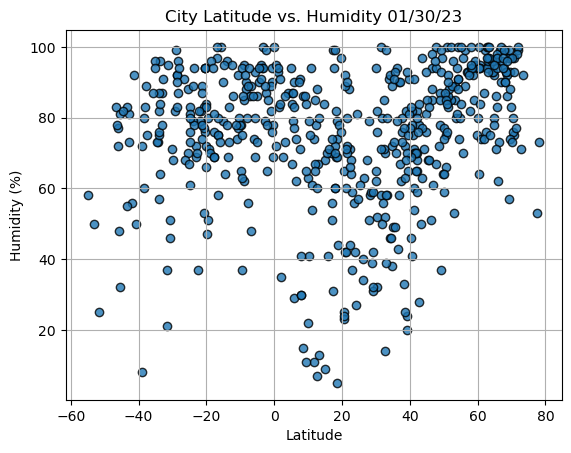

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


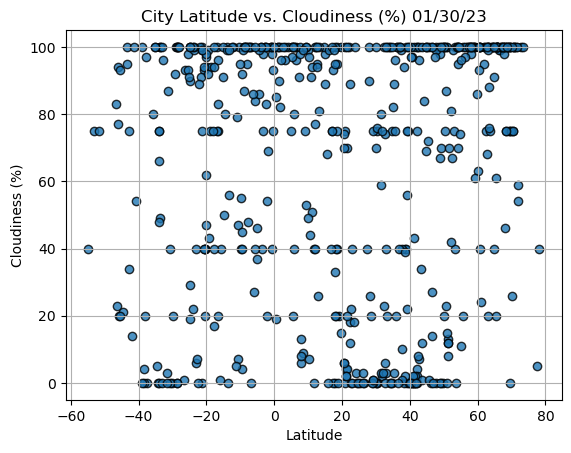

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


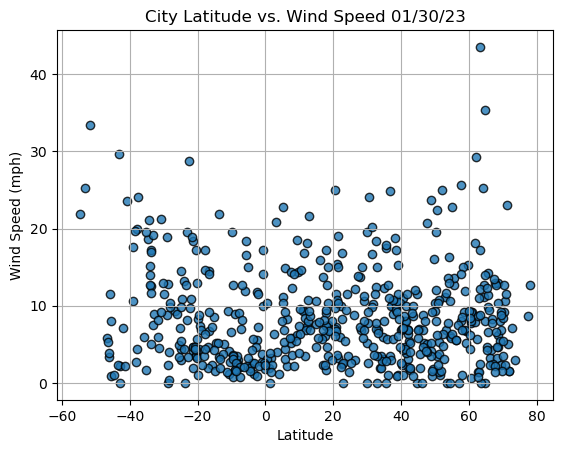

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [25]:
index13 = city_data_df.loc[13]

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Wajima,JP,2023-01-30 20:22:11,37.4000,136.9000,35.04,62,99,10.04
3,Kapaa,US,2023-01-30 20:22:12,22.0752,-159.3190,71.58,88,100,5.99
4,Yellowknife,CA,2023-01-30 20:21:14,62.4560,-114.3525,-17.88,76,75,5.75
5,Road Town,VG,2023-01-30 20:22:13,18.4167,-64.6167,80.69,74,40,10.36
6,Port Hardy,CA,2023-01-30 20:22:13,50.6996,-127.4199,33.98,75,100,3.44


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


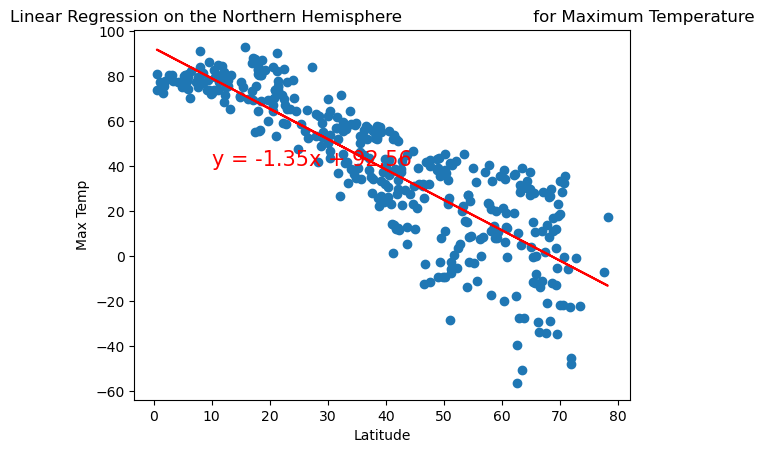

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


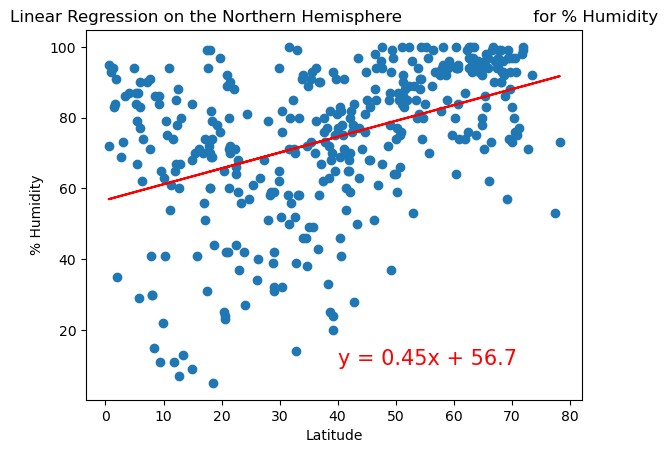

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


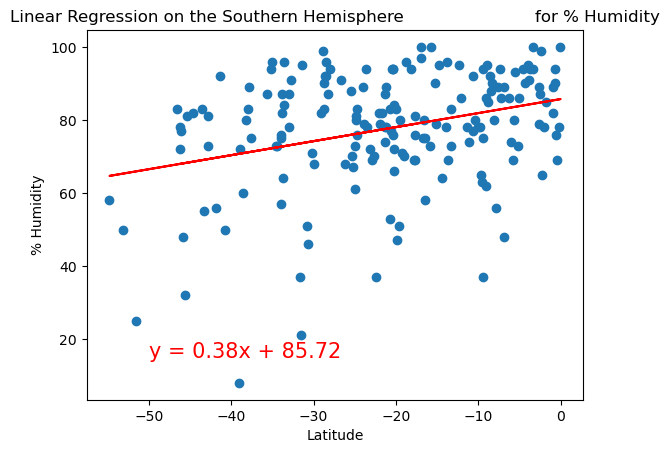

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


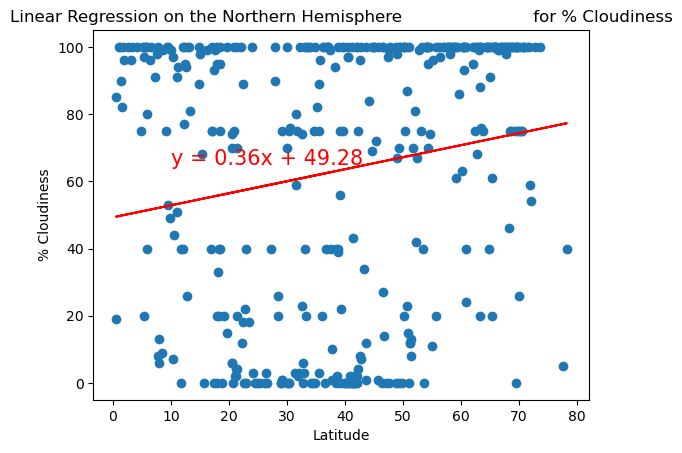

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,65))


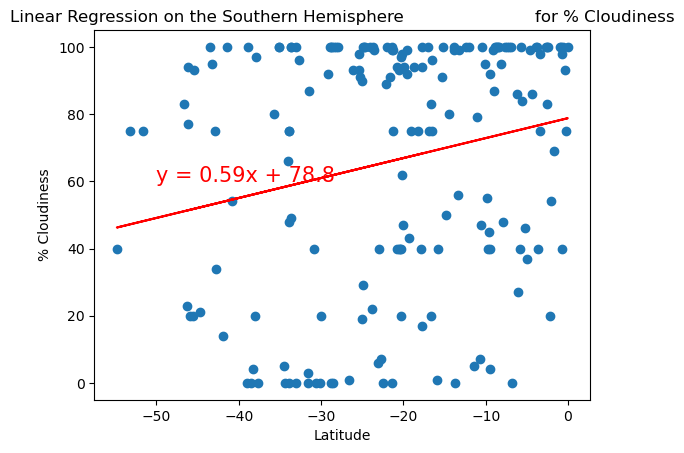

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


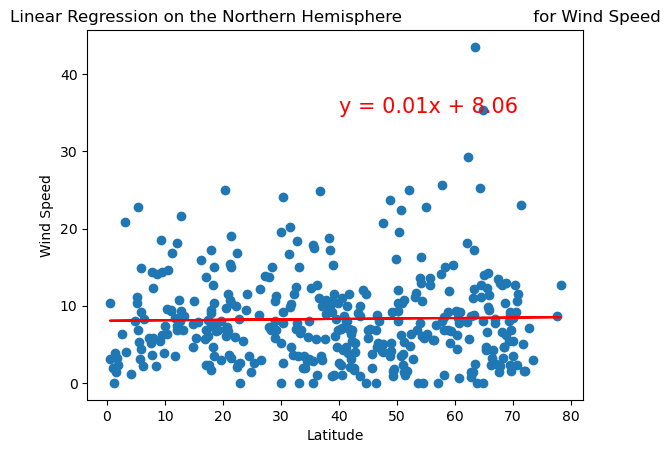

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


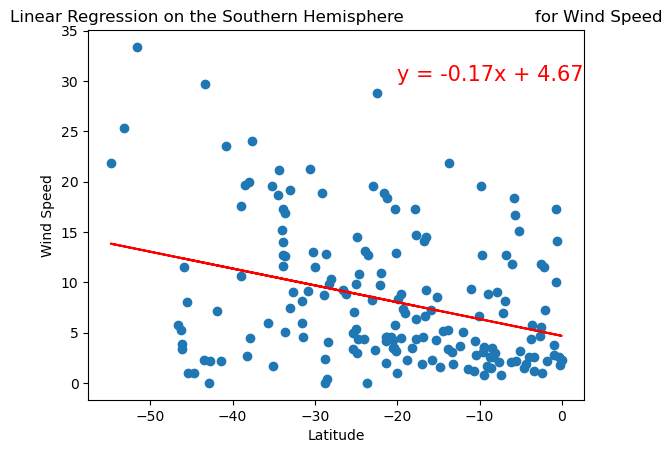

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-20,30))
